Exploratory Data Analysis (EDA) of the dataset, followed by solubility prediction (specifically LogS) based on SMILES and chemical descriptors


In [232]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [233]:
# data loading
file_path = 'solubility_DB.csv'
solubility_df = pd.read_csv(file_path)

In [234]:
print(solubility_df)

                                                 SMILES    MolWt  MolLogP  \
0       CCCN1C(=O)N(CCC)C2=C([NH]C(=N2)C3CCC(=O)C3)C1=O  318.377   1.5429   
1     CC[S](=O)(=O)c1nc2ccccn2c1[S](=O)(=O)NC(=O)Nc3...  470.489   0.4455   
2                                      CN1C=C(I)C=CC1=O  235.024   0.9899   
3            [Bi+3].OC(CC([O-])=O)(CC([O-])=O)C([O-])=O  398.079  -5.6334   
4                         ClC1=C(Cl)C(Cl)(Cl)C(=C1Cl)Cl  272.773   4.5523   
...                                                 ...      ...      ...   
8977         CC(=O)OC1C2C(CC(C)C3C=CC(=O)C31C)OC(=O)C2C  306.358   1.8970   
8978                   NC1=C2C=CC(Cl)=CC2=NC2=C1C=CC=C2  228.682   3.6236   
8979  NCC(=O)NC1=CC=C(C=C1)[S](=O)(=O)NC2=NN=C(S2)[S...  392.444  -1.1165   
8980                      CC(CC(C)(C(O)=O)C(O)=O)C(O)=O  204.178   0.2727   
8981                           CCSC(=S)N[C@@H](C)C(O)=O  193.293   1.0871   

         MolMR  HeavyAtomCount  NumHAcceptors  NumHDonors  NumHeteroatoms  

In [235]:
# data info
print("Data info")
print(solubility_df.info())
print(solubility_df.describe())

Data info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8982 entries, 0 to 8981
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   SMILES               8982 non-null   object 
 1   MolWt                8932 non-null   float64
 2   MolLogP              8932 non-null   float64
 3   MolMR                8932 non-null   float64
 4   HeavyAtomCount       8932 non-null   float64
 5   NumHAcceptors        8932 non-null   float64
 6   NumHDonors           8932 non-null   float64
 7   NumHeteroatoms       8932 non-null   float64
 8   NumRotatableBonds    8932 non-null   float64
 9   NumValenceElectrons  8932 non-null   float64
 10  NumAromaticRings     8932 non-null   float64
 11  NumSaturatedRings    8932 non-null   float64
 12  NumAliphaticRings    8932 non-null   float64
 13  RingCount            8932 non-null   float64
 14  TPSA                 8932 non-null   float64
 15  LabuteASA            8932 no

In [236]:
# Checking for missing values
print(f'Number of missing values in each column:')
print(solubility_df.isna().sum())

Number of missing values in each column:
SMILES                  0
MolWt                  50
MolLogP                50
MolMR                  50
HeavyAtomCount         50
NumHAcceptors          50
NumHDonors             50
NumHeteroatoms         50
NumRotatableBonds      50
NumValenceElectrons    50
NumAromaticRings       50
NumSaturatedRings      50
NumAliphaticRings      50
RingCount              50
TPSA                   50
LabuteASA              50
BalabanJ               50
BertzCT                50
Solubility_mg_L        50
dtype: int64


In [237]:
# Checking for duplicates
print(f"Number of duplicated rows:")
print(solubility_df.duplicated().sum())

Number of duplicated rows:
50


In [238]:
#Removing rows with missing values
solubility_df['any_na']=solubility_df.isna().sum(axis=1)
solubility_nona=solubility_df[solubility_df['any_na']==0]
solubility_nona

,SMILES,MolWt,MolLogP,MolMR,HeavyAtomCount,NumHAcceptors,NumHDonors,NumHeteroatoms,NumRotatableBonds,NumValenceElectrons,NumAromaticRings,NumSaturatedRings,NumAliphaticRings,RingCount,TPSA,LabuteASA,BalabanJ,BertzCT,Solubility_mg_L,any_na
0,CCCN1C(=O)N(CCC)C2=C([NH]C(=N2)C3CCC(=O)C3)C1=O,318.377,1.5429,86.7947,23.0,6.0,1.0,7.0,5.0,124.0,2.0,1.0,1.0,3.0,89.75,132.894213,2.210591,858.558110,220.263069,0
1,CC[S](=O)(=O)c1nc2ccccn2c1[S](=O)(=O)NC(=O)Nc3...,470.489,0.4455,107.3950,31.0,11.0,2.0,15.0,7.0,166.0,3.0,0.0,0.0,3.0,170.95,176.964823,1.988589,1329.784268,17.924600,0
2,CN1C=C(I)C=CC1=O,235.024,0.9899,44.4000,9.0,2.0,0.0,3.0,0.0,48.0,1.0,0.0,0.0,1.0,22.00,66.649325,3.339140,266.005525,229991.726541,0
3,[Bi+3].OC(CC([O-])=O)(CC([O-])=O)C([O-])=O,398.079,-5.6334,34.9588,14.0,7.0,1.0,8.0,5.0,76.0,0.0,0.0,0.0,0.0,140.62,97.473720,0.000000,232.564575,10.970000,0
4,ClC1=C(Cl)C(Cl)(Cl)C(=C1Cl)Cl,272.773,4.5523,51.9010,11.0,0.0,0.0,6.0,0.0,62.0,0.0,0.0,1.0,1.0,0.00,93.633580,3.266579,234.146208,1.800120,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8977,CC(=O)OC1C2C(CC(C)C3C=CC(=O)C31C)OC(=O)C2C,306.358,1.8970,77.6130,22.0,5.0,0.0,5.0,1.0,120.0,0.0,2.0,3.0,3.0,69.67,129.582885,2.101450,565.396606,1978.013383,0
8978,NC1=C2C=CC(Cl)=CC2=NC2=C1C=CC=C2,228.682,3.6236,68.6714,16.0,2.0,1.0,3.0,0.0,78.0,3.0,0.0,0.0,3.0,38.91,97.657537,2.552257,691.892730,4258.258106,0
8979,NCC(=O)NC1=CC=C(C=C1)[S](=O)(=O)NC2=NN=C(S2)[S...,392.444,-1.1165,86.2168,24.0,9.0,4.0,14.0,6.0,130.0,2.0,0.0,0.0,2.0,187.23,140.729074,2.181373,951.124973,25338.312826,0
8980,CC(CC(C)(C(O)=O)C(O)=O)C(O)=O,204.178,0.2727,44.7954,14.0,3.0,3.0,6.0,5.0,80.0,0.0,0.0,0.0,0.0,111.90,80.161113,4.793424,255.005070,159004.327895,0


In [239]:
#Removing duplicated rows
solubility_clear = solubility_nona.drop_duplicates(subset= 'SMILES').drop('any_na', axis=1)
solubility_clear

,SMILES,MolWt,MolLogP,MolMR,HeavyAtomCount,NumHAcceptors,NumHDonors,NumHeteroatoms,NumRotatableBonds,NumValenceElectrons,NumAromaticRings,NumSaturatedRings,NumAliphaticRings,RingCount,TPSA,LabuteASA,BalabanJ,BertzCT,Solubility_mg_L
0,CCCN1C(=O)N(CCC)C2=C([NH]C(=N2)C3CCC(=O)C3)C1=O,318.377,1.5429,86.7947,23.0,6.0,1.0,7.0,5.0,124.0,2.0,1.0,1.0,3.0,89.75,132.894213,2.210591,858.558110,220.263069
1,CC[S](=O)(=O)c1nc2ccccn2c1[S](=O)(=O)NC(=O)Nc3...,470.489,0.4455,107.3950,31.0,11.0,2.0,15.0,7.0,166.0,3.0,0.0,0.0,3.0,170.95,176.964823,1.988589,1329.784268,17.924600
2,CN1C=C(I)C=CC1=O,235.024,0.9899,44.4000,9.0,2.0,0.0,3.0,0.0,48.0,1.0,0.0,0.0,1.0,22.00,66.649325,3.339140,266.005525,229991.726541
3,[Bi+3].OC(CC([O-])=O)(CC([O-])=O)C([O-])=O,398.079,-5.6334,34.9588,14.0,7.0,1.0,8.0,5.0,76.0,0.0,0.0,0.0,0.0,140.62,97.473720,0.000000,232.564575,10.970000
4,ClC1=C(Cl)C(Cl)(Cl)C(=C1Cl)Cl,272.773,4.5523,51.9010,11.0,0.0,0.0,6.0,0.0,62.0,0.0,0.0,1.0,1.0,0.00,93.633580,3.266579,234.146208,1.800120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8977,CC(=O)OC1C2C(CC(C)C3C=CC(=O)C31C)OC(=O)C2C,306.358,1.8970,77.6130,22.0,5.0,0.0,5.0,1.0,120.0,0.0,2.0,3.0,3.0,69.67,129.582885,2.101450,565.396606,1978.013383
8978,NC1=C2C=CC(Cl)=CC2=NC2=C1C=CC=C2,228.682,3.6236,68.6714,16.0,2.0,1.0,3.0,0.0,78.0,3.0,0.0,0.0,3.0,38.91,97.657537,2.552257,691.892730,4258.258106
8979,NCC(=O)NC1=CC=C(C=C1)[S](=O)(=O)NC2=NN=C(S2)[S...,392.444,-1.1165,86.2168,24.0,9.0,4.0,14.0,6.0,130.0,2.0,0.0,0.0,2.0,187.23,140.729074,2.181373,951.124973,25338.312826
8980,CC(CC(C)(C(O)=O)C(O)=O)C(O)=O,204.178,0.2727,44.7954,14.0,3.0,3.0,6.0,5.0,80.0,0.0,0.0,0.0,0.0,111.90,80.161113,4.793424,255.005070,159004.327895


In [240]:
#Creating appropriate columns containing labels and target values for modeling
solubility_clear['LogS'] = np.log10((0.001 * solubility_clear['Solubility_mg_L'])/solubility_clear['MolWt'])

#Thus, the old solubility column is no longer needed
solubility_clear.drop(columns='Solubility_mg_L',inplace=True)

Correlation and outliers analysis

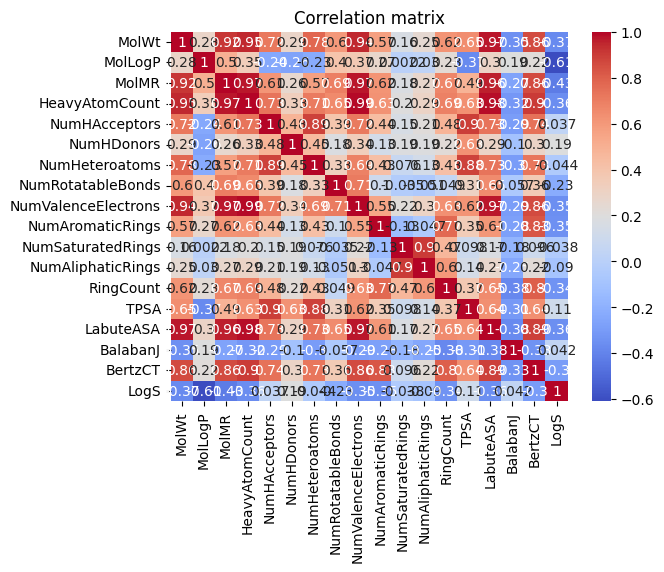

In [241]:
#correlation matrix as heatmap
solubility_props = solubility_clear.drop(['SMILES'], axis = 1)
correlation_matrix = solubility_props.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation matrix')
plt.show()

In [242]:
#column list for further analysis
solubility_clear.columns.tolist()

['SMILES',
 'MolWt',
 'MolLogP',
 'MolMR',
 'HeavyAtomCount',
 'NumHAcceptors',
 'NumHDonors',
 'NumHeteroatoms',
 'NumRotatableBonds',
 'NumValenceElectrons',
 'NumAromaticRings',
 'NumSaturatedRings',
 'NumAliphaticRings',
 'RingCount',
 'TPSA',
 'LabuteASA',
 'BalabanJ',
 'BertzCT',
 'LogS']

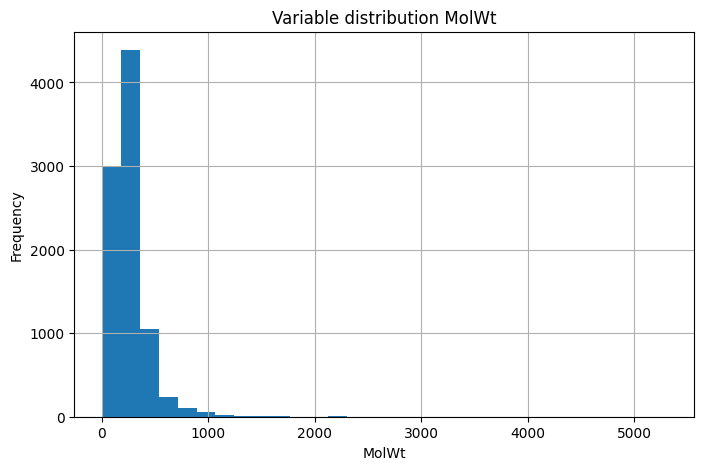

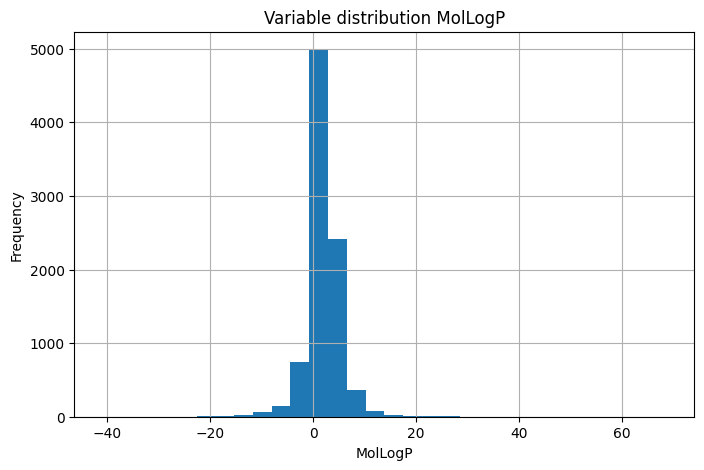

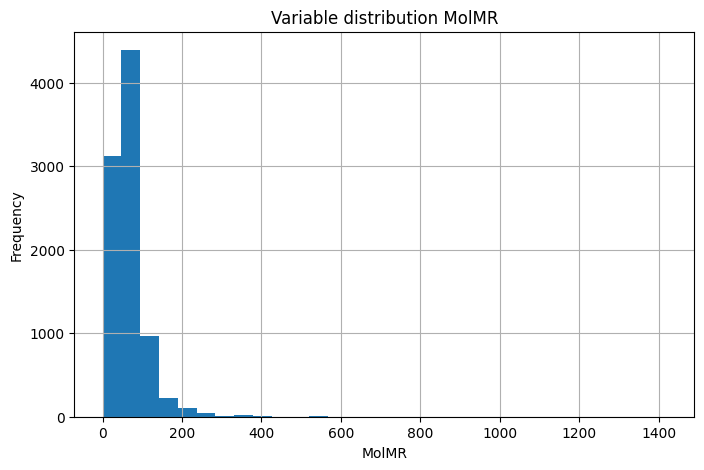

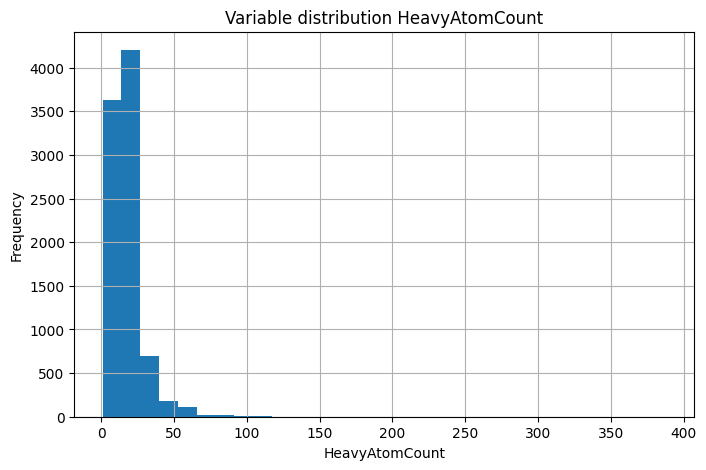

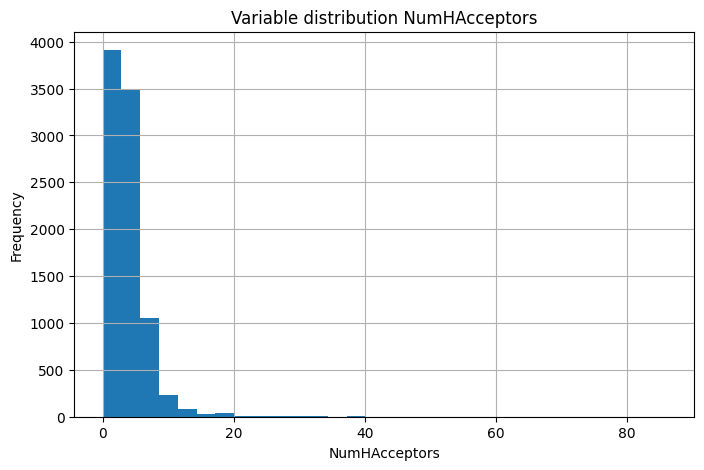

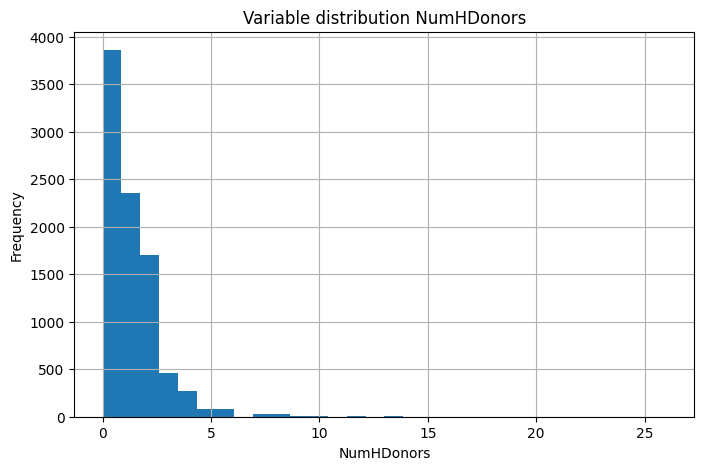

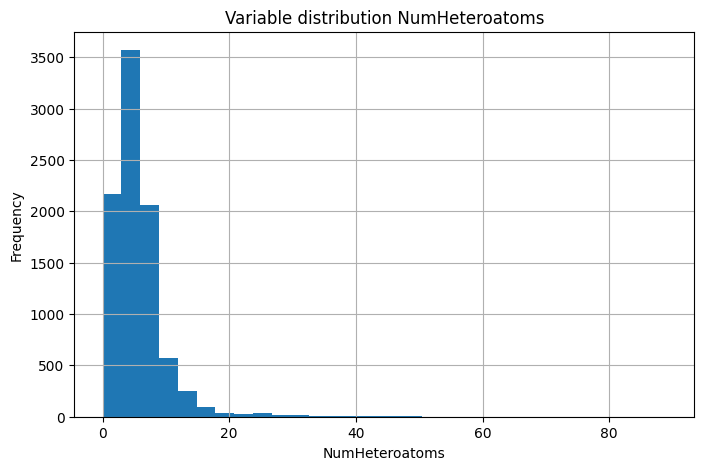

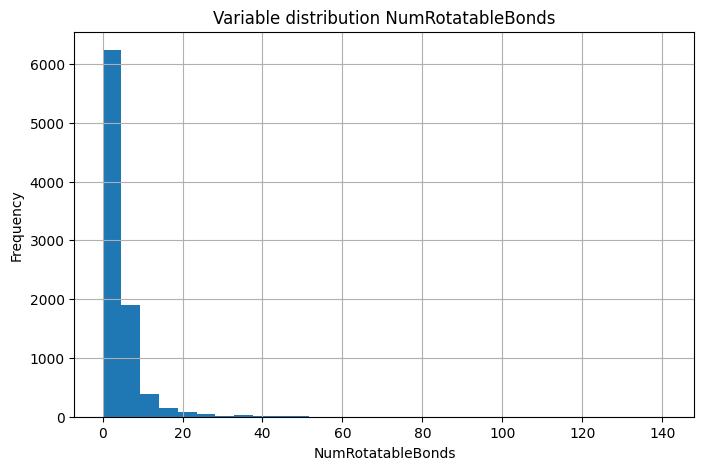

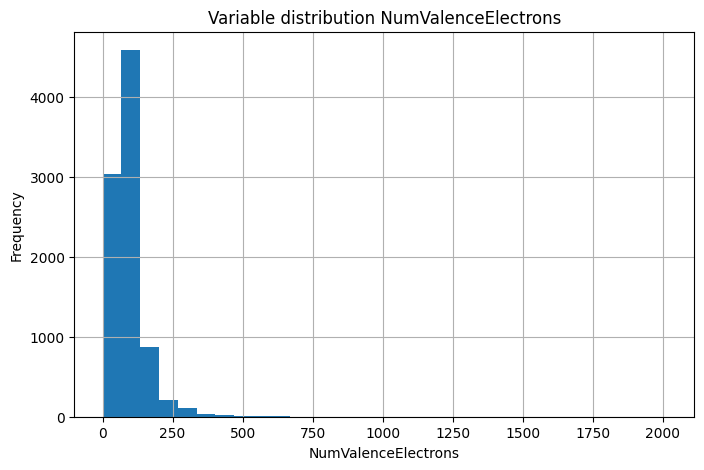

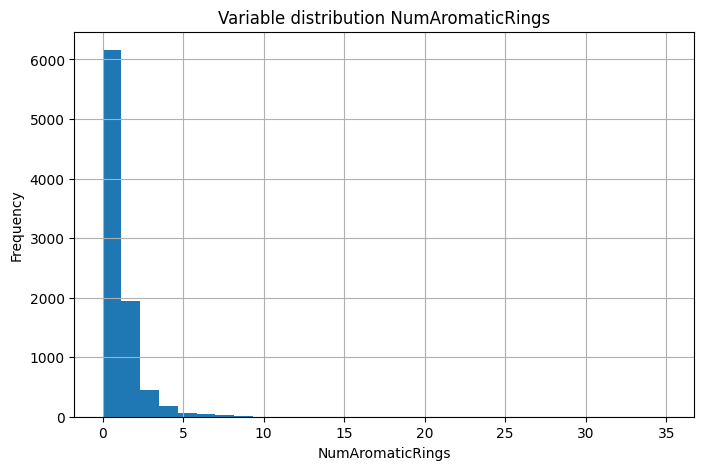

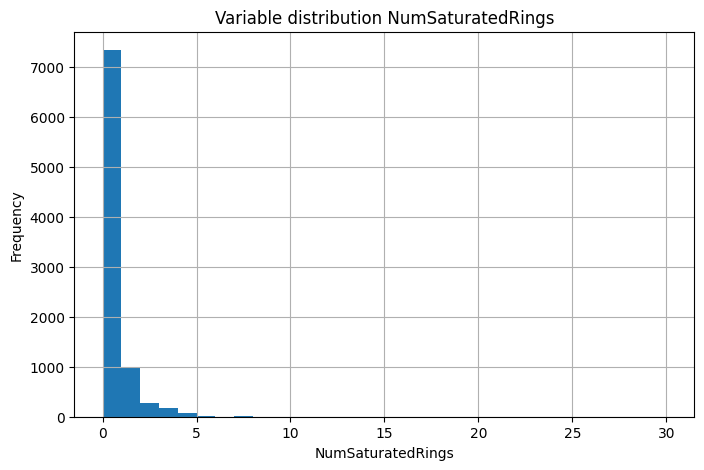

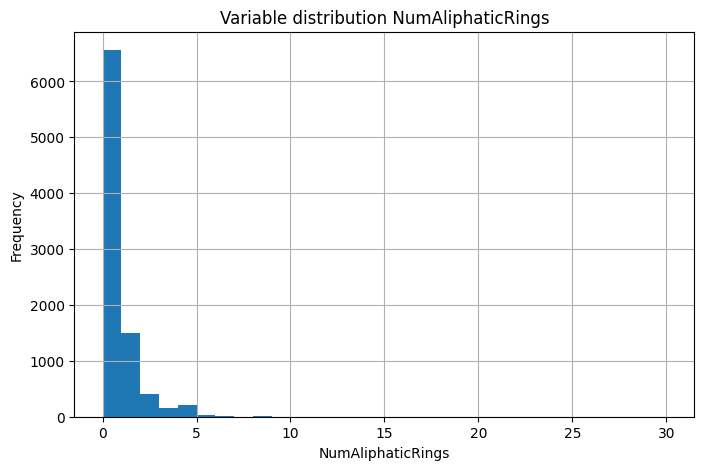

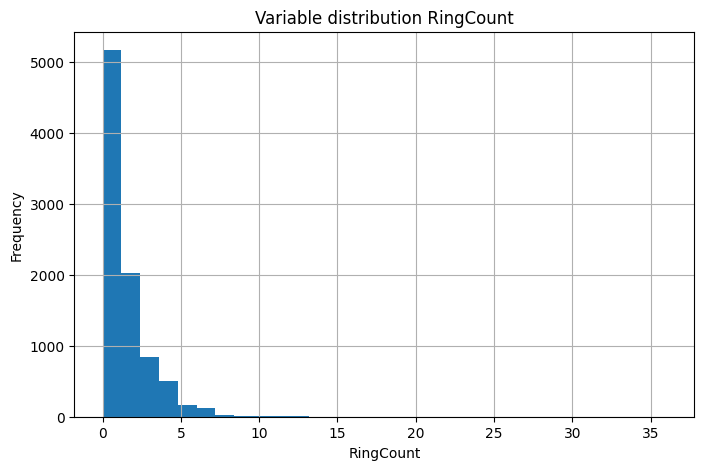

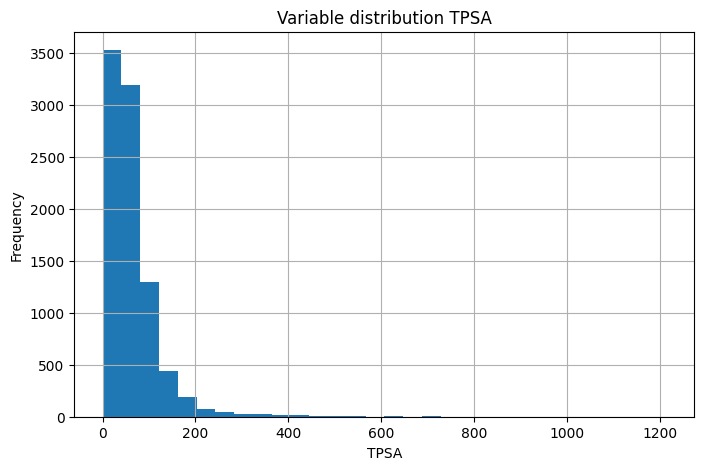

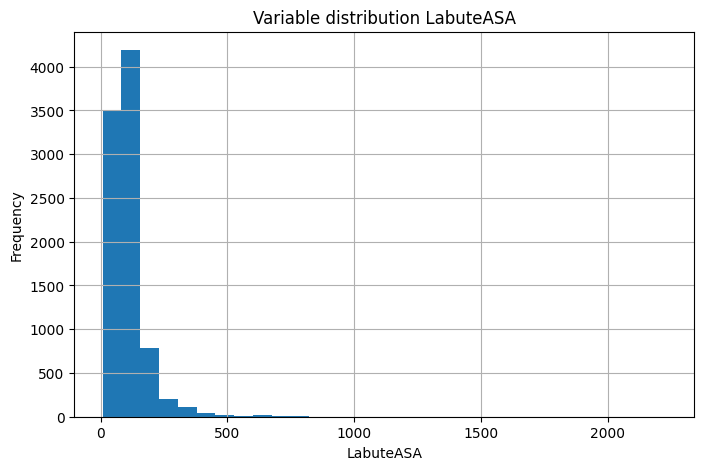

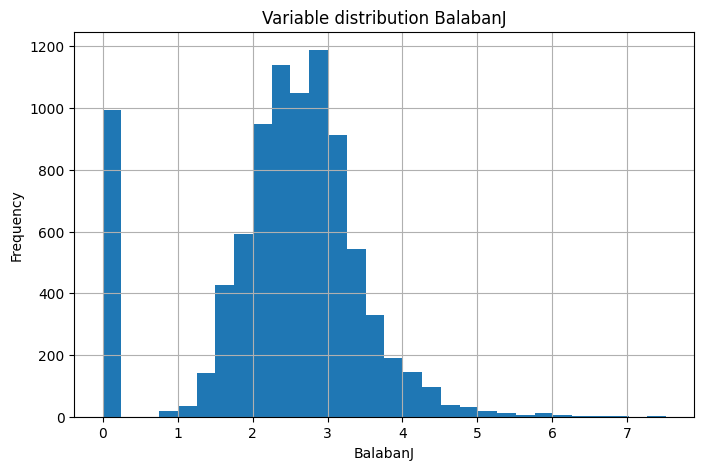

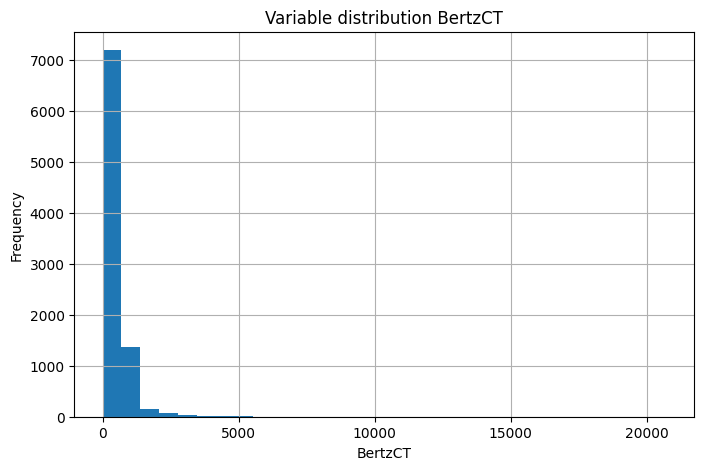

In [243]:
#Charts for data assessment
props = [
   'MolWt',
 'MolLogP',
 'MolMR',
 'HeavyAtomCount',
 'NumHAcceptors',
 'NumHDonors',
 'NumHeteroatoms',
 'NumRotatableBonds',
 'NumValenceElectrons',
 'NumAromaticRings',
 'NumSaturatedRings',
 'NumAliphaticRings',
 'RingCount',
 'TPSA',
 'LabuteASA',
 'BalabanJ',
 'BertzCT',
]

for feature in props:
    plt.figure(figsize=(8,5))
    solubility_bez_duplik[feature].hist(bins=30)
    plt.title(f'Variable distribution {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

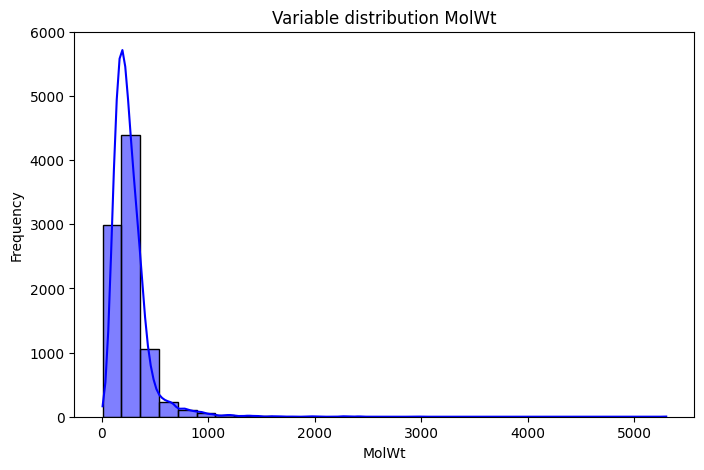

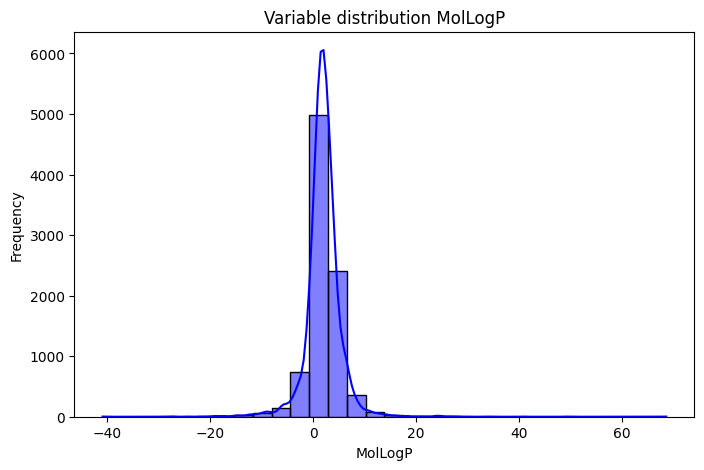

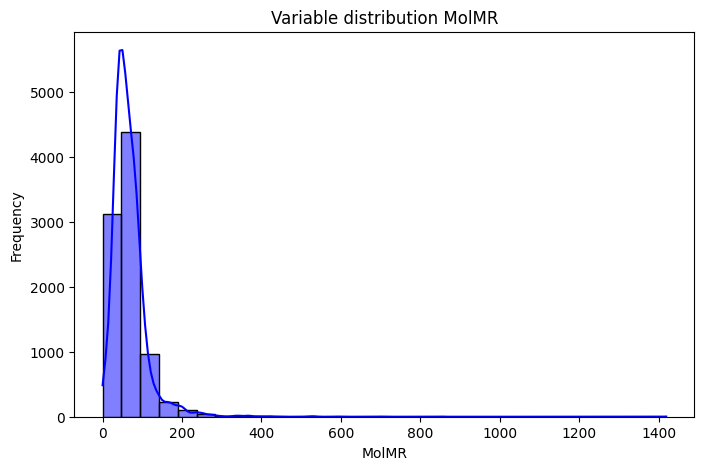

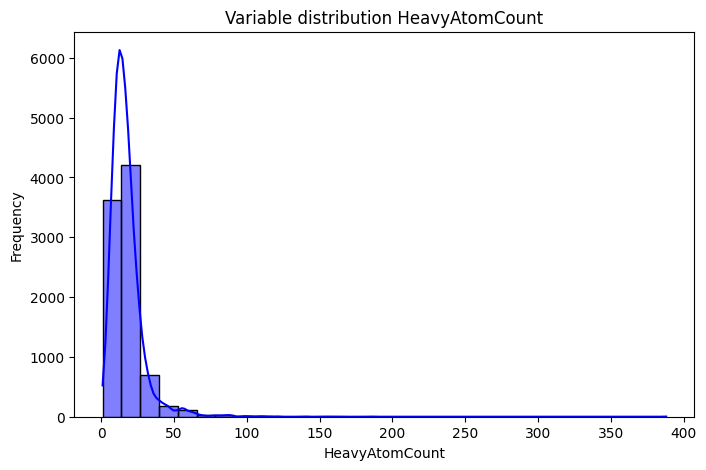

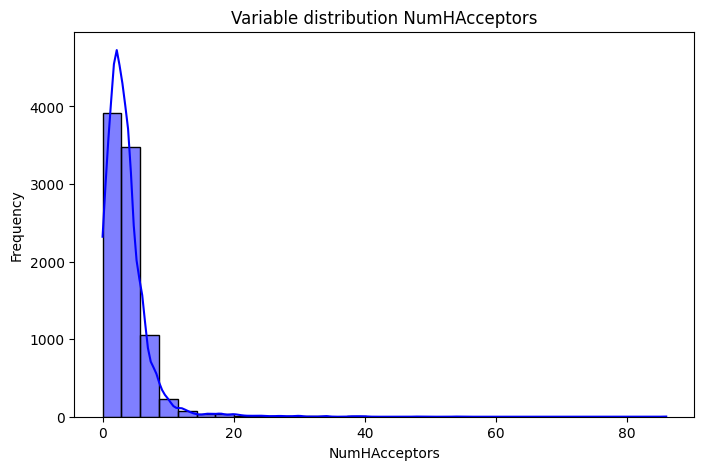

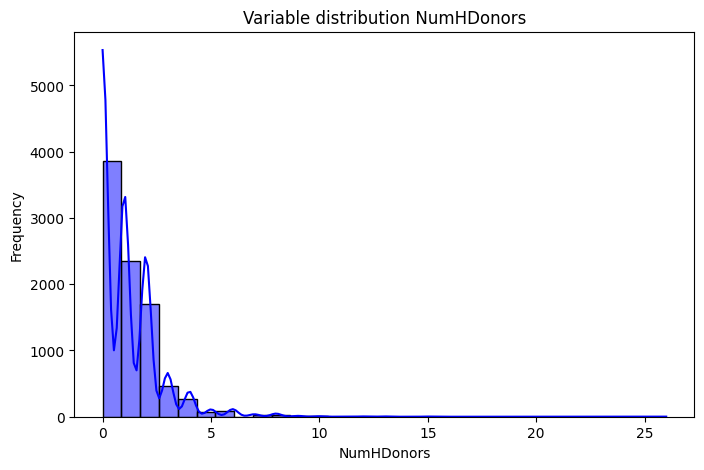

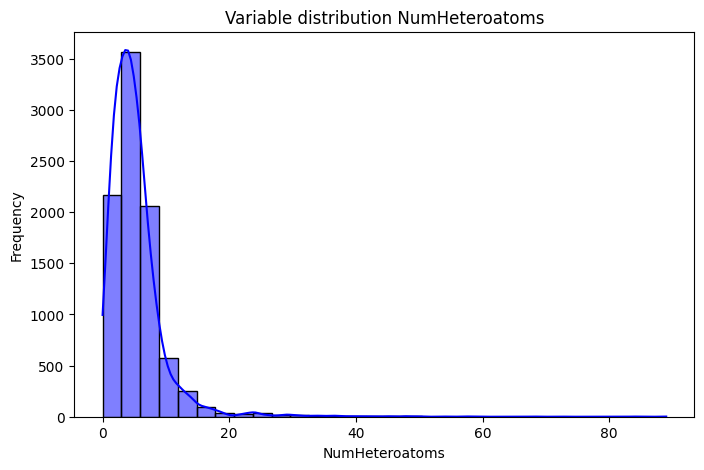

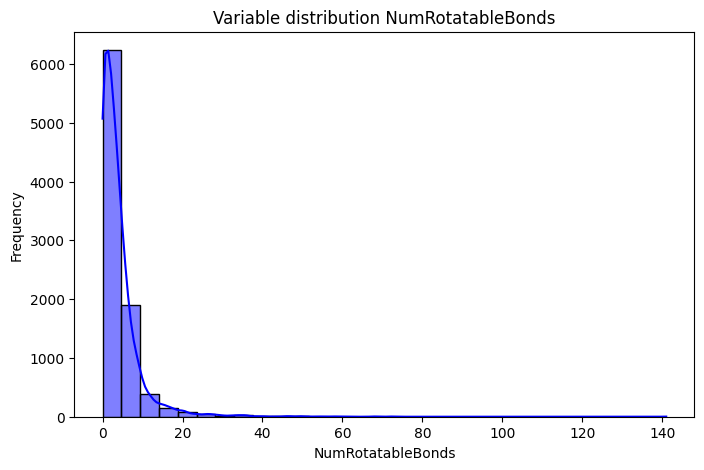

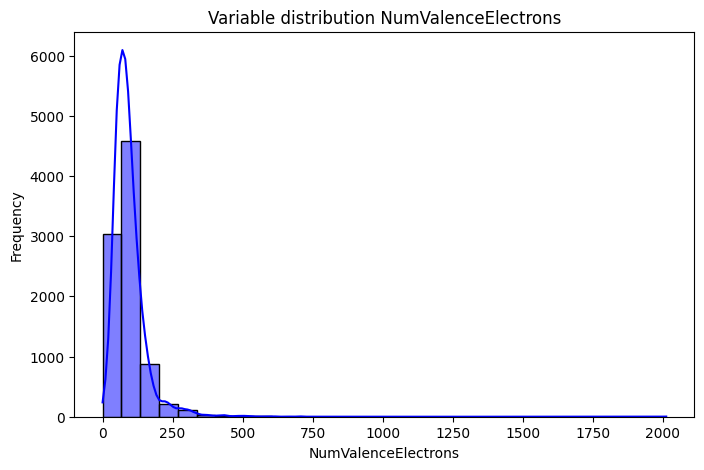

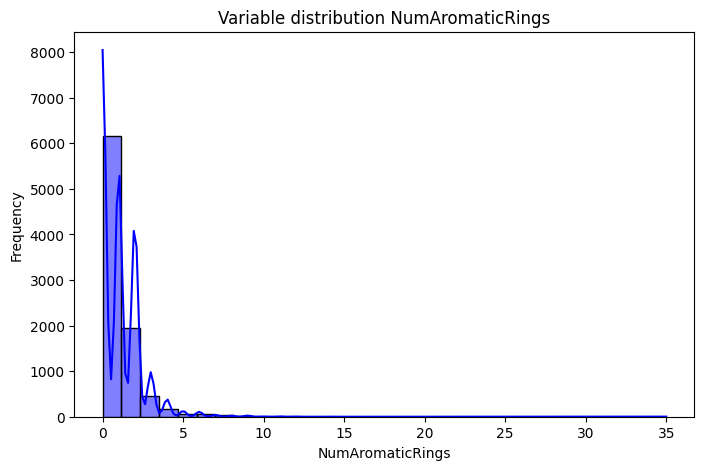

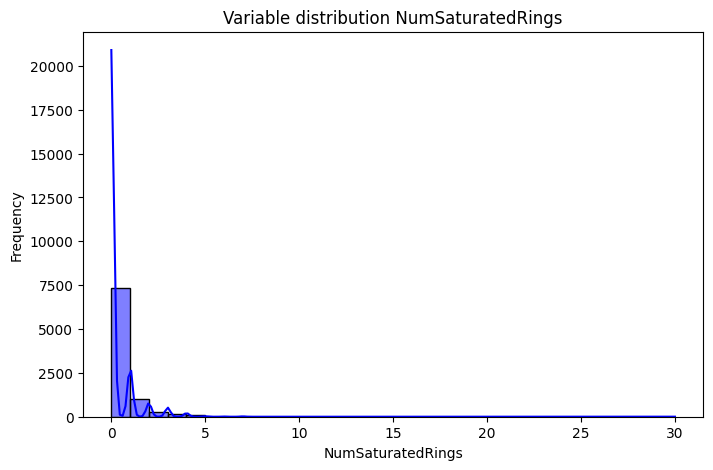

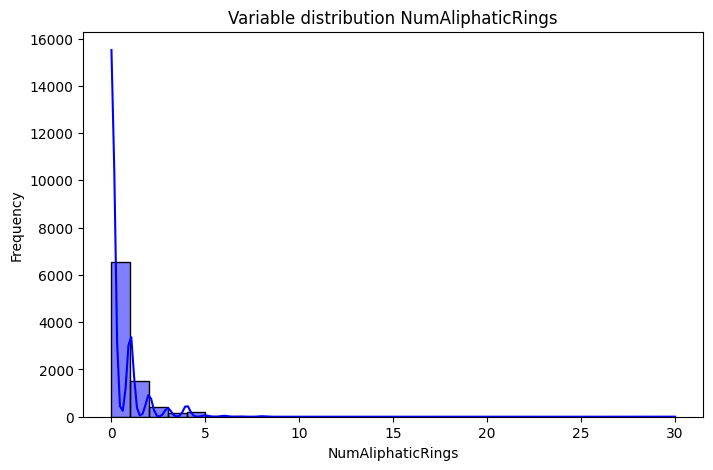

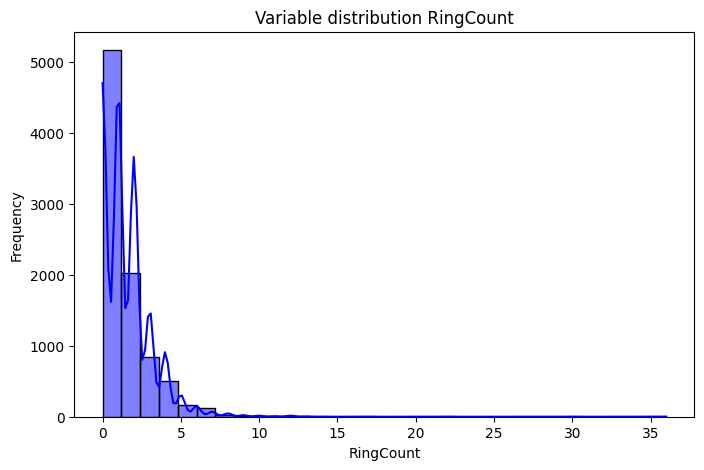

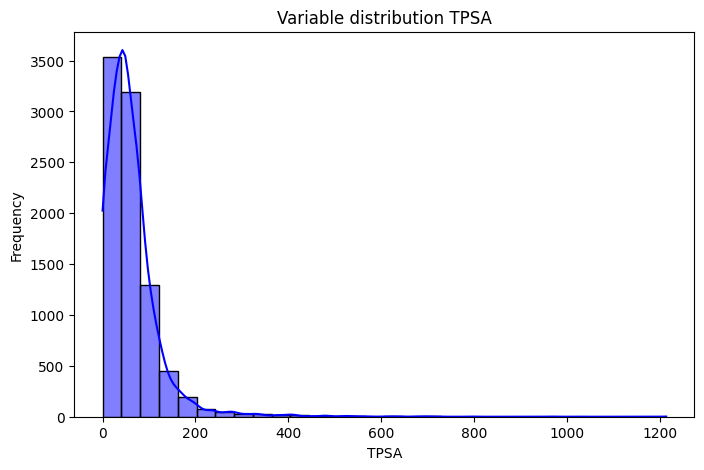

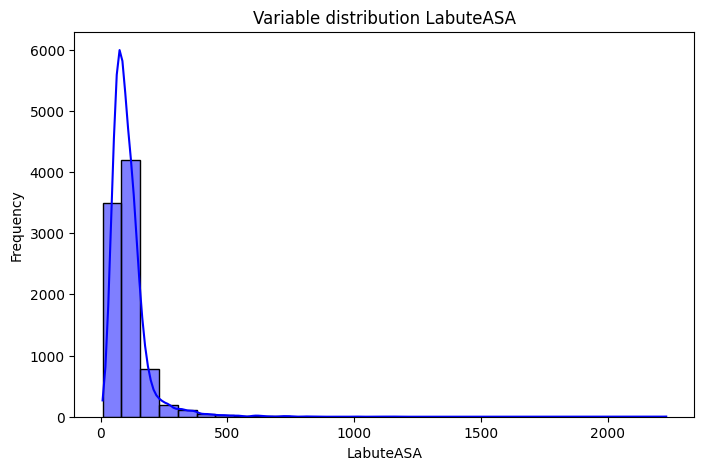

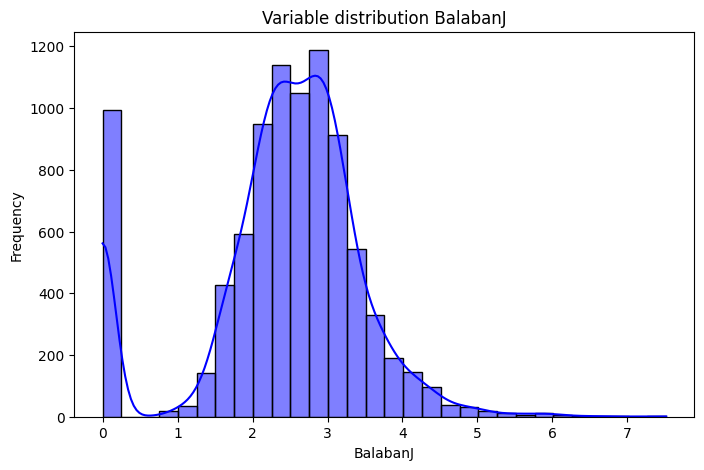

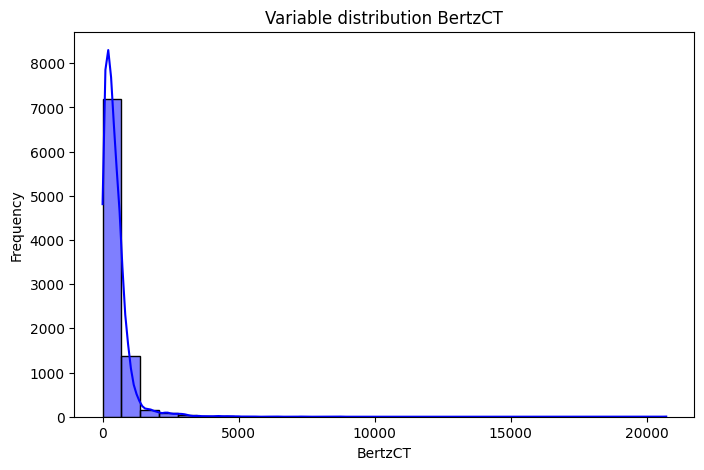

In [244]:
for feature in props:
    plt.figure(figsize=(8,5))
    sns.histplot(solubility_bez_duplik[feature], kde=True, bins=30, color='blue')
    plt.title(f'Variable distribution {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

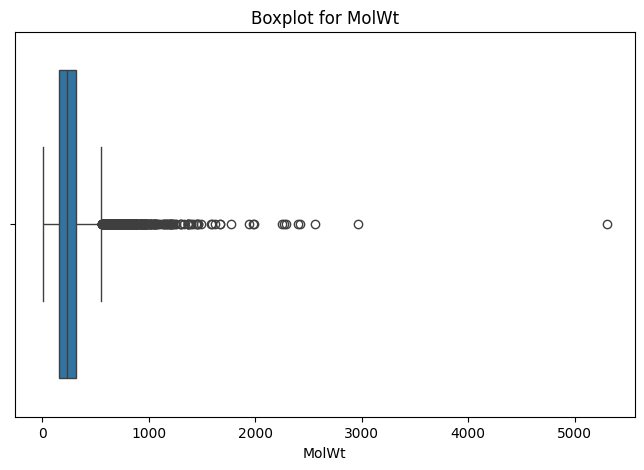

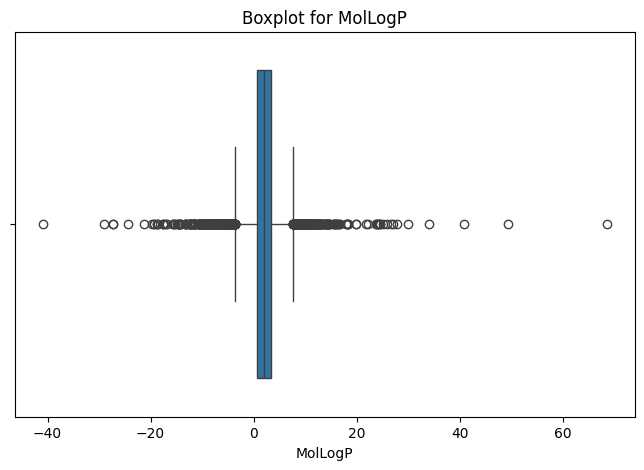

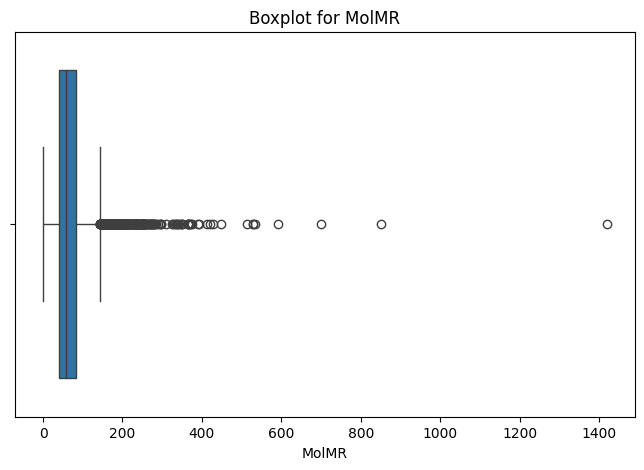

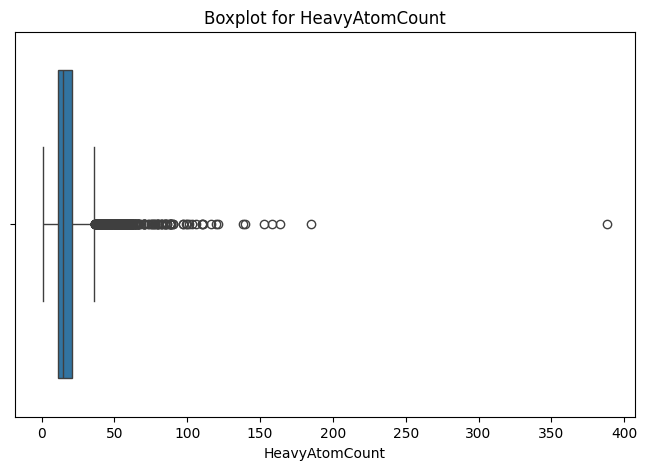

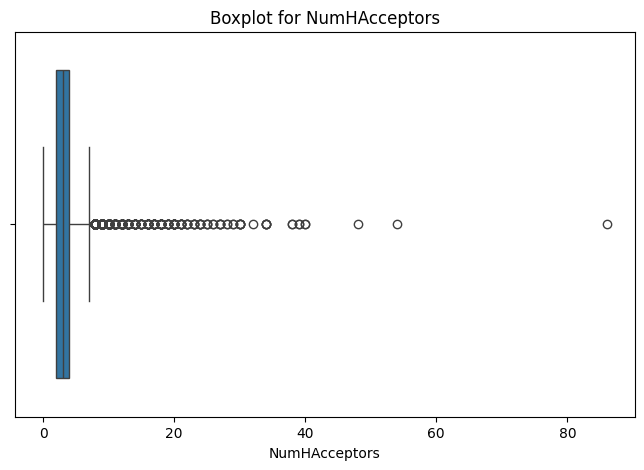

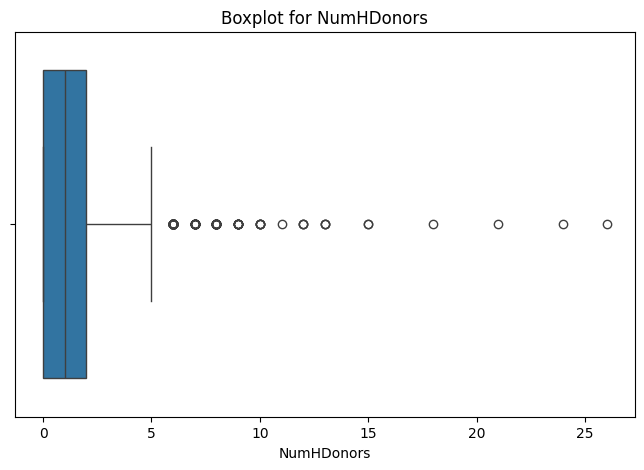

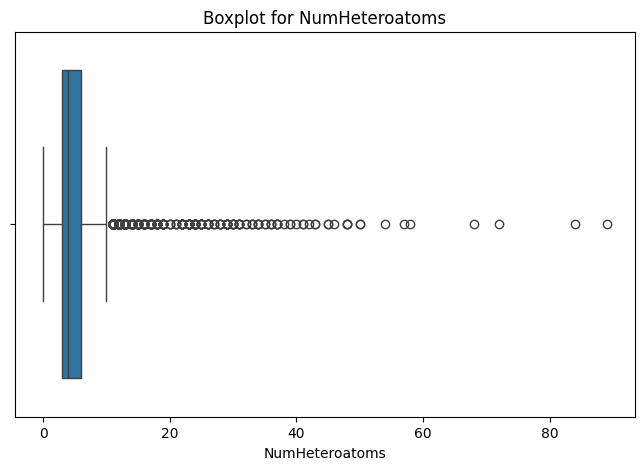

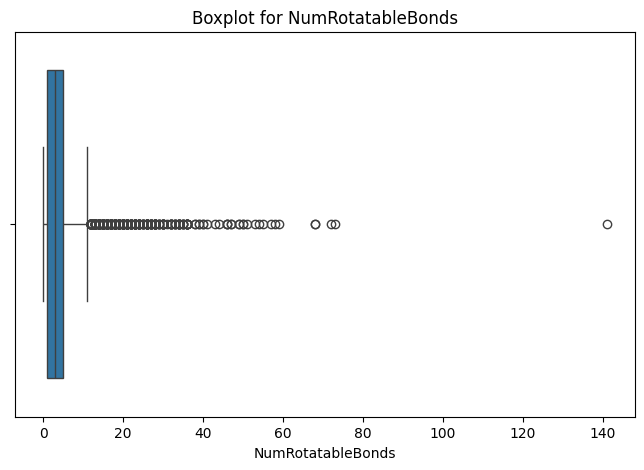

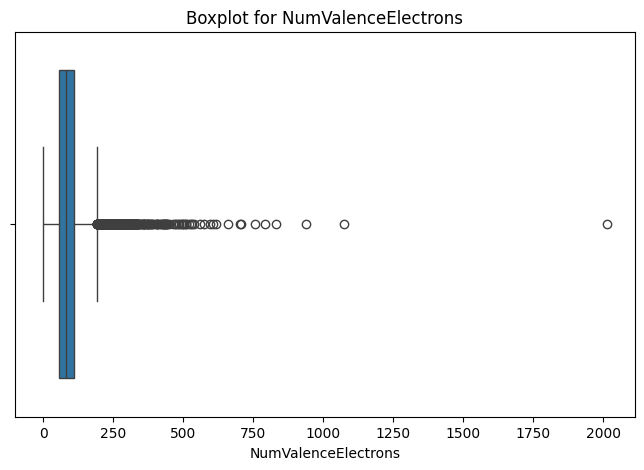

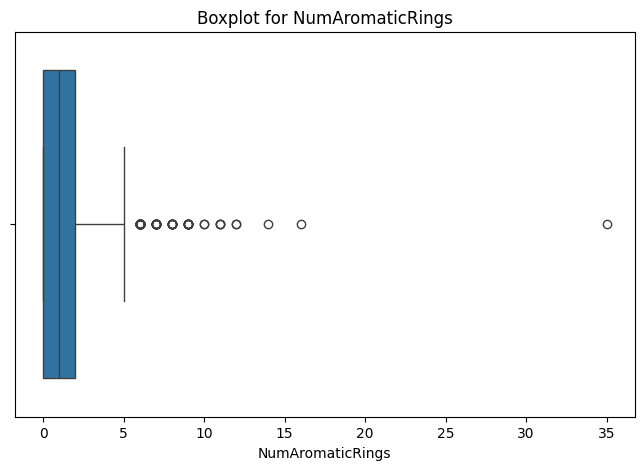

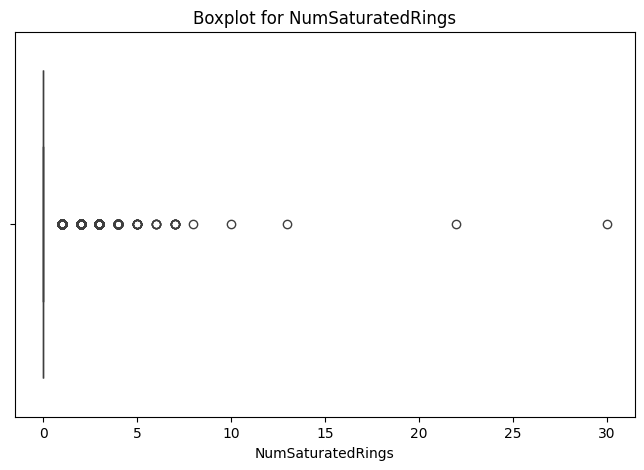

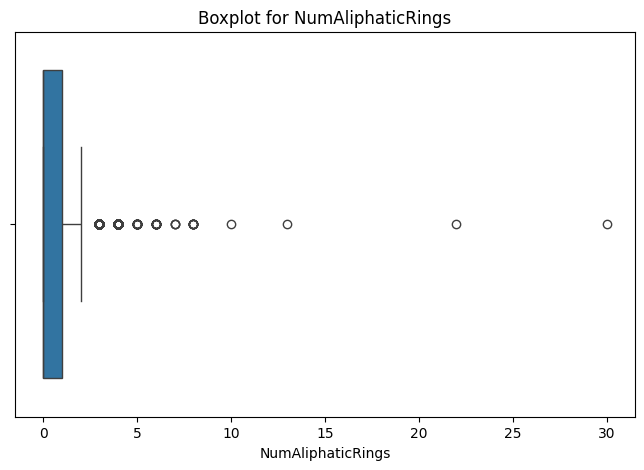

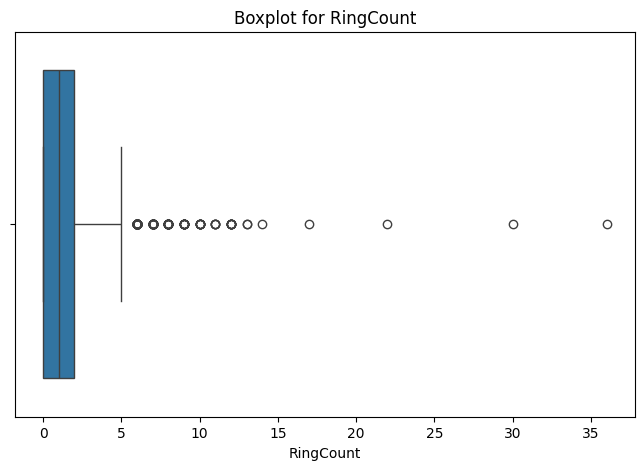

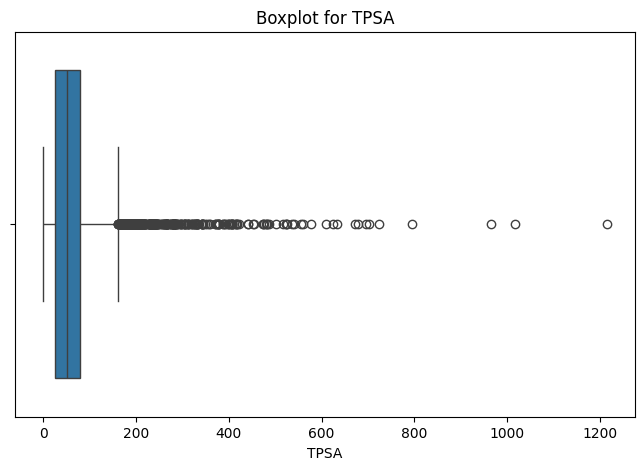

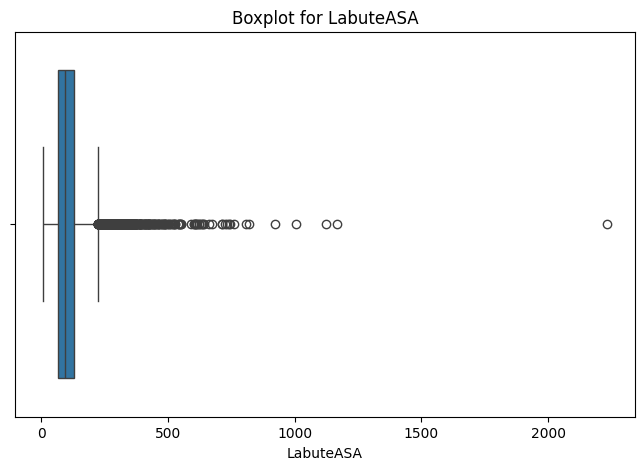

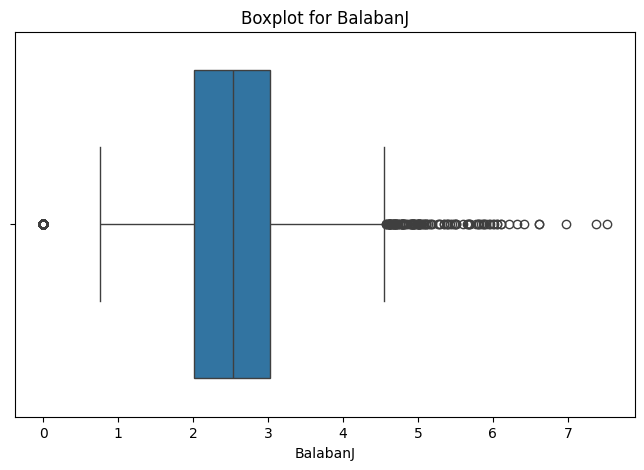

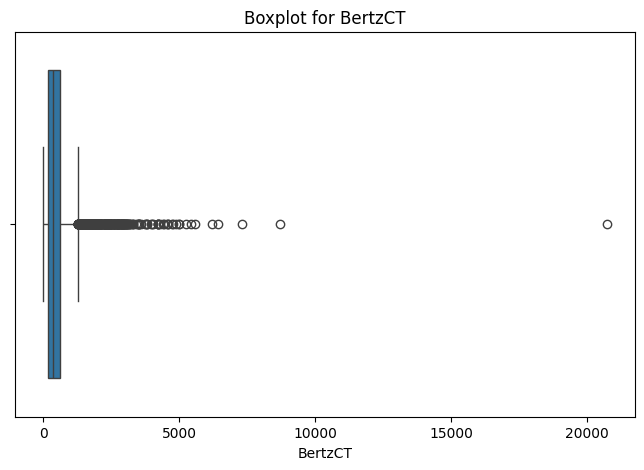

In [245]:
for column in props:
    plt.figure(figsize=(8,5))
    sns.boxplot(data=solubility_bez_duplik, x=column)
    plt.title(f'Boxplot for {column}')
    plt.show()

The charts show that the data contains many outliers; let's try different analysis methods to assess their number (we don't want to remove too many)

In [246]:
#Outlier analysis using the IQR method

solubility_clear['outlier_metoda1'] = 0

for column in props:

    Q1 = solubility_clear[column].quantile(0.25)

    Q3 = solubility_clear[column].quantile(0.75)

    IQR = Q3 - Q1

    outliers_metoda1 = solubility_clear[(solubility_clear[column] < Q1 - 1.5 * IQR) | (solubility_clear[column] > Q3 + 1.5 * IQR)]

    #Labeling values in the outlier column

    solubility_clear.loc[outliers_metoda1.index, 'outlier_metoda1'] = 1

    print(f'Outliers for {column}: {len(outliers_metoda1)}')

Outliers for MolWt: 420
Outliers for MolLogP: 606
Outliers for MolMR: 393
Outliers for HeavyAtomCount: 413
Outliers for NumHAcceptors: 653
Outliers for NumHDonors: 166
Outliers for NumHeteroatoms: 629
Outliers for NumRotatableBonds: 530
Outliers for NumValenceElectrons: 435
Outliers for NumAromaticRings: 98
Outliers for NumSaturatedRings: 1551
Outliers for NumAliphaticRings: 420
Outliers for RingCount: 187
Outliers for TPSA: 419
Outliers for LabuteASA: 441
Outliers for BalabanJ: 1119
Outliers for BertzCT: 381


In [247]:
#Outlier removal using the Isolation Forest method

from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
columns_to_check = [
      'MolWt',
 'MolLogP',
 'MolMR',
 'HeavyAtomCount',
 'NumHAcceptors',
 'NumHDonors',
 'NumHeteroatoms',
 'NumRotatableBonds',
 'NumValenceElectrons',
 'NumAromaticRings',
 'NumSaturatedRings',
 'NumAliphaticRings',
 'RingCount',
 'TPSA',
 'LabuteASA',
 'BalabanJ',
 'BertzCT',
]
scaler1 = StandardScaler()
scaled_data = scaler1.fit_transform(solubility_clear[columns_to_check])
model_outlier = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)
model_outlier.fit(scaled_data)
outliers = model_outlier.predict(scaled_data)
outliers_poprawny = [1 if val == -1 else 0 for val in outliers]
solubility_clear['outlier_metoda2'] = outliers_poprawny
print(f'Outliers sum: {sum(outliers_poprawny)}')

Outliers sum: 445


In [248]:
#Removing outliers identified by the Isolation Forest method
solubility_ready = solubility_clear[solubility_clear['outlier_metoda2'] == 0].drop('outlier_metoda2', axis=1)
solubility_ready = solubility_ready.drop(columns=['outlier_metoda1'])
solubility_ready = solubility_ready.reset_index(drop=True)
print(solubility_ready)


                                                 SMILES    MolWt  MolLogP  \
0       CCCN1C(=O)N(CCC)C2=C([NH]C(=N2)C3CCC(=O)C3)C1=O  318.377   1.5429   
1     CC[S](=O)(=O)c1nc2ccccn2c1[S](=O)(=O)NC(=O)Nc3...  470.489   0.4455   
2                                      CN1C=C(I)C=CC1=O  235.024   0.9899   
3            [Bi+3].OC(CC([O-])=O)(CC([O-])=O)C([O-])=O  398.079  -5.6334   
4                         ClC1=C(Cl)C(Cl)(Cl)C(=C1Cl)Cl  272.773   4.5523   
...                                                 ...      ...      ...   
8432         CC(=O)OC1C2C(CC(C)C3C=CC(=O)C31C)OC(=O)C2C  306.358   1.8970   
8433                   NC1=C2C=CC(Cl)=CC2=NC2=C1C=CC=C2  228.682   3.6236   
8434  NCC(=O)NC1=CC=C(C=C1)[S](=O)(=O)NC2=NN=C(S2)[S...  392.444  -1.1165   
8435                      CC(CC(C)(C(O)=O)C(O)=O)C(O)=O  204.178   0.2727   
8436                           CCSC(=S)N[C@@H](C)C(O)=O  193.293   1.0871   

         MolMR  HeavyAtomCount  NumHAcceptors  NumHDonors  NumHeteroatoms  

In [249]:
solubility_ready.to_csv('solubility_ready_by_Aga.csv', index=False)


In [250]:
solubility_ready.columns.tolist()

['SMILES',
 'MolWt',
 'MolLogP',
 'MolMR',
 'HeavyAtomCount',
 'NumHAcceptors',
 'NumHDonors',
 'NumHeteroatoms',
 'NumRotatableBonds',
 'NumValenceElectrons',
 'NumAromaticRings',
 'NumSaturatedRings',
 'NumAliphaticRings',
 'RingCount',
 'TPSA',
 'LabuteASA',
 'BalabanJ',
 'BertzCT',
 'LogS']

Preparing data for modeling

In [251]:
#Preparing datasets
X = solubility_ready.drop(['SMILES', 'LogS'], axis=1)
Y = solubility_ready[['LogS']]

In [252]:
X.shape

(8437, 17)

In [253]:
Y.shape

(8437, 1)

In [254]:
from sklearn import *
import pickle

In [255]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size=0.20,
                                                                    random_state=42, shuffle=True)

In [256]:
#Scaling data for neural network models
scalerX = preprocessing.MinMaxScaler(feature_range=(0, 1))
scalerX.fit(X_train)
X_train_scaled = scalerX.transform(X_train)
X_test_scaled = scalerX.transform(X_test)

In [257]:
#Saving the scaler object to a file
with open('scalerX_projekt.pkl', 'wb') as file:
    pickle.dump(scalerX, file)

In [258]:
scalerY=preprocessing.MinMaxScaler(feature_range=(0, 1))
scalerY.fit(y_train)
y_train_scaled=scalerY.transform(y_train)
y_test_scaled=scalerY.transform(y_test)

In [259]:
with open('scalerY_projekt.pkl', 'wb') as file:
    pickle.dump(scalerY, file)
print("Scaler saved as 'scalerY_projekt.pkl'")

Scaler saved as 'scalerY_projekt.pkl'


In [260]:
#Function for summarizing model performance
from sklearn.metrics import mean_squared_error
def model_results(metrics_type, observed, predicted):
    print(f"Results for {metrics_type} data:")
    r2 = metrics.r2_score(observed, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(observed, predicted))
    nrmse = rmse / (observed.max(axis=0) - observed.min(axis=0)) * 100
    print(f'  R2: {r2:.2f}')
    print(f'  RMSE: {rmse:.2f}')
    if isinstance(nrmse, np.ndarray) or isinstance(nrmse, pd.Series):
        nrmse = nrmse.iloc[0] if isinstance(nrmse, pd.Series) else nrmse[0]
    print(f"  NRMSE [%]: {nrmse:.2f}")

    plt.figure(figsize=(4, 3))
    color = 'green'
    plt.scatter(observed, predicted, color=color, alpha=0.6)
    plt.plot([observed.min(), observed.max()], [observed.min(), observed.max()], 'r--')
    plt.xlabel('Observed Values')
    plt.ylabel('Predicted Values')
    plt.title(f'Observed vs Predicted Values ({metrics_type.capitalize()} Data)')
    plt.show()


In [261]:
#Building the MLPRegressor model
mlp = neural_network.MLPRegressor(
    hidden_layer_sizes=(50,30,10),
    activation='relu',
    solver='adam',
    max_iter=100,
    n_iter_no_change=10
)

mlp.fit(X_train_scaled, y_train_scaled)

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1650: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPRegressor(hidden_layer_sizes=(50, 30, 10), max_iter=100)

In [262]:
with open("MLP_model.pkl", "wb") as file:
    pickle.dump(mlp, file)
print("Model saved as 'MLP_model.pkl'.")


Model saved as 'MLP_model.pkl'.


Results for Learn metrics data:
  R2: 0.73
  RMSE: 1.19
  NRMSE [%]: 7.91


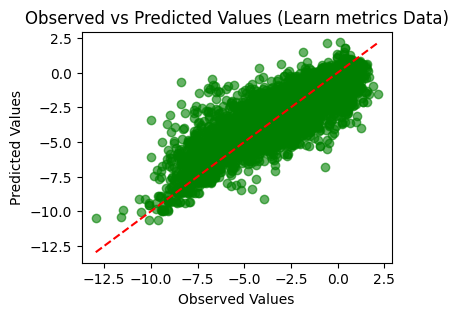

Results for Test metrics data:
  R2: 0.72
  RMSE: 1.23
  NRMSE [%]: 9.00


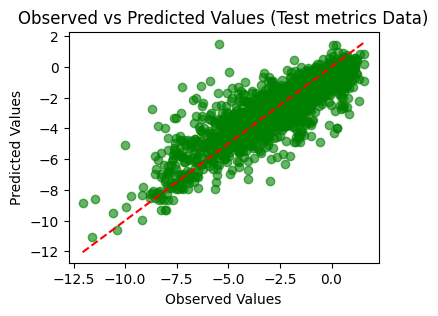

In [263]:
#Making predictions and reversing the scaling process
y_pred = scalerY.inverse_transform(mlp.predict(X_test_scaled).reshape(-1,1))
y_pred_train = scalerY.inverse_transform(mlp.predict(X_train_scaled).reshape(-1,1))

#Calculating and displaying model metrics for training and test data
model_results("Learn metrics", y_train, y_pred_train)
model_results("Test metrics", y_test, y_pred)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END hidden_layer_sizes=(50, 30, 10), max_iter=100, n_iter_no_change=50; total time=   1.5s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END hidden_layer_sizes=(50, 30, 10), max_iter=100, n_iter_no_change=50; total time=   2.1s
[CV] END hidden_layer_sizes=(50, 30, 10), max_iter=100, n_iter_no_change=50; total time=   2.4s
[CV] END hidden_layer_sizes=(50, 30, 10), max_iter=100, n_iter_no_change=50; total time=   1.5s
[CV] END hidden_layer_sizes=(50, 30, 10), max_iter=100, n_iter_no_change=50; total time=   1.6s
[CV] END hidden_layer_sizes=(50, 20, 10), max_iter=500, n_iter_no_change=50; total time=   1.2s
[CV] END hidden_layer_sizes=(50, 20, 10), max_iter=500, n_iter_no_change=50; total time=   1.4s
[CV] END hidden_layer_sizes=(50, 20, 10), max_iter=500, n_iter_no_change=50; total time=   1.2s
[CV] END hidden_layer_sizes=(50, 20, 10), max_iter=500, n_iter_no_change=50; total time=   1.2s
[CV] END hidden_layer_sizes=(50, 20, 10), max_iter=500, n_iter_no_change=50; total time=   1.3s
[CV] END hidden_layer_sizes=(50, 30, 10), max_iter=100, n_iter_no_change=10; total time=   0.8s
[CV] END hidden_layer_sizes=(50, 30, 10)

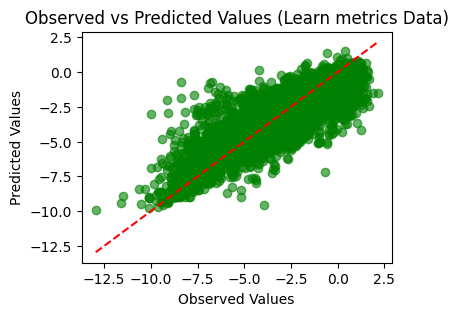

Results for Test metrics data:
  R2: 0.72
  RMSE: 1.23
  NRMSE [%]: 9.01


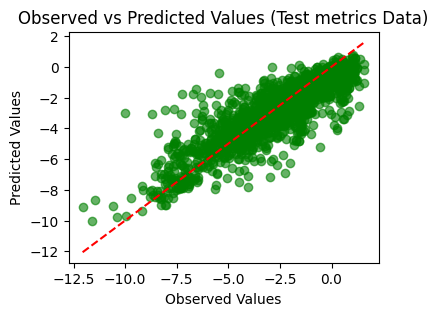

In [264]:
mlp = neural_network.MLPRegressor()

#Model hyperparameter search/optimization
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

param_grid = {
    'hidden_layer_sizes': [(50,30,10), (50, 20,10), (50,10,10), (50,30,10,10)],
    'max_iter': [100, 500],
    'n_iter_no_change': [10, 50]
}

random_search = RandomizedSearchCV(
    estimator=mlp,
    param_distributions=param_grid,
    scoring='neg_root_mean_squared_error',
    n_iter=5,
    cv=5,
    verbose=2,
    n_jobs=1
)

random_search.fit(X_train_scaled, y_train_scaled.ravel())

#Results
print("Best parametrs:", random_search.best_params_)
print("Best R² (cross validation):", random_search.best_score_)

#best model
best_model = random_search.best_estimator_

#Prediction and inverse scaling
y_pred_test = scalerY.inverse_transform(best_model.predict(X_test_scaled).reshape(-1, 1))
y_pred_train = scalerY.inverse_transform(best_model.predict(X_train_scaled).reshape(-1, 1))

model_results("Learn metrics", y_train, y_pred_train)
model_results("Test metrics", y_test, y_pred_test)


In [265]:
reg = linear_model.LinearRegression()

In [266]:
reg.fit(X_train_scaled, y_train_scaled)

LinearRegression()

In [267]:
#Analyzing the structure of the linear regression model
results = pd.DataFrame(X.columns, columns=["Variable"])
results["Coeff"] = reg.coef_[0]
results

,Variable,Coeff
0,MolWt,-0.390198
1,MolLogP,-1.378619
2,MolMR,0.627721
3,HeavyAtomCount,-0.167932
4,NumHAcceptors,0.135492
5,NumHDonors,0.098518
6,NumHeteroatoms,0.033935
7,NumRotatableBonds,-0.015550
8,NumValenceElectrons,0.398989
9,NumAromaticRings,-0.108380


Results for Linear Regression - Train Metrics data:
  R2: 0.61
  RMSE: 1.44
  NRMSE [%]: 9.54


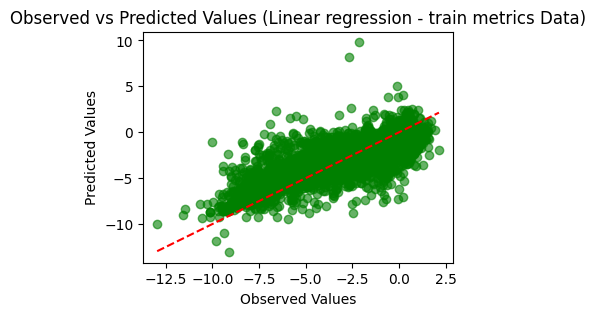

Results for Linear Regression - Test Metrics data:
  R2: 0.61
  RMSE: 1.45
  NRMSE [%]: 10.62


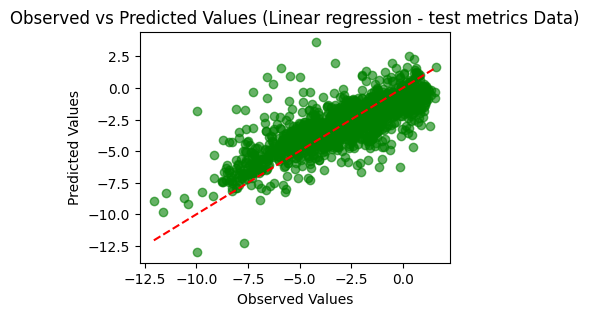

In [268]:
y_pred_train_scaled = reg.predict(X_train_scaled)
y_pred_test_scaled = reg.predict(X_test_scaled)

y_pred_train = scalerY.inverse_transform(y_pred_train_scaled)
y_pred_test = scalerY.inverse_transform(y_pred_test_scaled)

model_results("Linear Regression - Train Metrics", y_train, y_pred_train)
model_results("Linear Regression - Test Metrics", y_test, y_pred_test)

Since some features are highly correlated, it is advisable to use tree-based models



Results for Learn metrics data:
  R2: 0.92
  RMSE: 0.67
  NRMSE [%]: 4.42


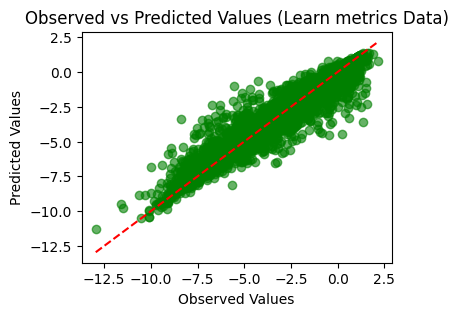

Results for Test metrics data:
  R2: 0.74
  RMSE: 1.18
  NRMSE [%]: 8.66


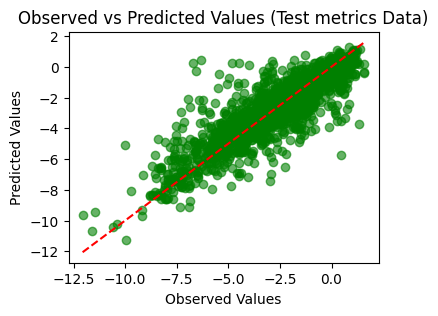

In [269]:
#Random forest model
RF = ensemble.RandomForestRegressor(n_estimators=5, min_samples_split=5, min_samples_leaf=2, max_depth=20
                                   )
RF.fit(X_train, y_train.values.ravel())

y_pred = RF.predict(X_test)
y_learn_pred = pd.DataFrame(RF.predict(X_train))

model_results("Learn metrics", y_train, y_learn_pred)
model_results("Test metrics", y_test, y_pred)

In [270]:
with open("RF_model.pkl", "wb") as file:
    pickle.dump(
        RF, file)
print("Model saved as 'RF_model.pkl'.")

Model saved as 'RF_model.pkl'.


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Results for Learn metrics data:
  R2: 0.85
  RMSE: 0.89
  NRMSE [%]: 5.90


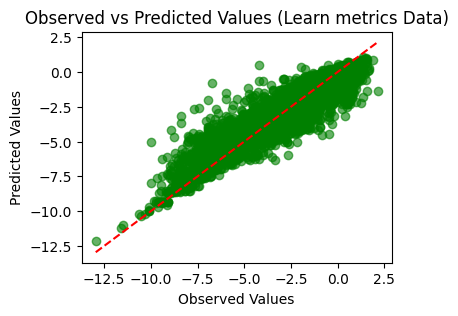

Results for Test metrics data:
  R2: 0.77
  RMSE: 1.11
  NRMSE [%]: 8.15


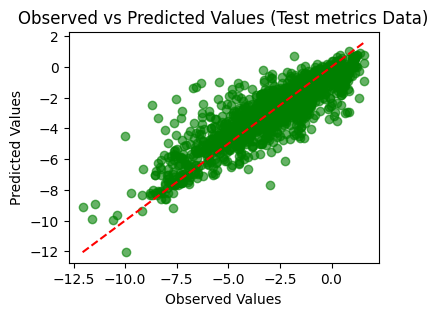

In [271]:
from sklearn.ensemble import ExtraTreesRegressor
xrt_model = ExtraTreesRegressor(
    n_estimators=50,
    max_depth=10,
    min_samples_split=5,
    random_state=42
)

xrt_model.fit(X_train, y_train)

y_pred = xrt_model.predict(X_test)

y_train_pred = xrt_model.predict(X_train)

model_results("Learn metrics", y_train, y_train_pred)
model_results("Test metrics", y_test, y_pred)

In [272]:
param_dist = {
    "n_estimators": [40, 50, 100],
    "max_features": ['none', 'sqrt', 'log2'],
    "max_depth": [10, 20, 30, 40],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "bootstrap": [True, False]
}

random_search = RandomizedSearchCV(
    estimator=xrt_model,
    param_distributions=param_dist,
    n_iter=50,
    cv=5,
    random_state=42,
    n_jobs=-1,
)

random_search.fit(X_train, y_train)

print("Best parametrs:", random_search.best_params_)


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
80 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
48 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/

Best parametrs: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20, 'bootstrap': False}


Results for Learn metrics data:
  R2: 0.95
  RMSE: 0.51
  NRMSE [%]: 3.40


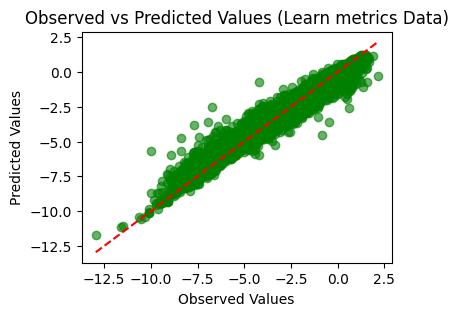

Results for Test metrics data:
  R2: 0.79
  RMSE: 1.08
  NRMSE [%]: 7.92


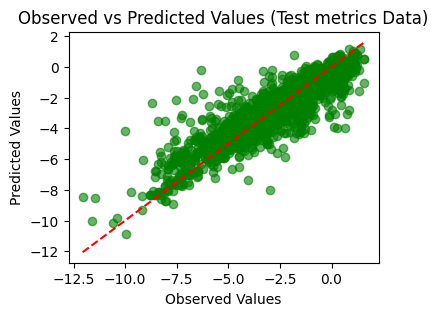

In [273]:

#Best model predictions
y_pred = random_search.best_estimator_.predict(X_test)

y_train_pred = random_search.best_estimator_.predict(X_train)
model_results("Learn metrics", y_train, y_train_pred)
model_results("Test metrics", y_test, y_pred)

In [274]:
best_model = random_search.best_estimator_

with open('best_model_xrt.pkl', 'wb') as f:
    pickle.dump(best_model, f)

Model validation on an external dataset

In [275]:
file_path = "solubility_DB_external.csv"
solubility_test_df = pd.read_csv(file_path)

In [276]:
solubility_test_df.isna().sum()

,0
SMILES,0
MolWt,0
MolLogP,0
MolMR,0
HeavyAtomCount,0
NumHAcceptors,0
NumHDonors,0
NumHeteroatoms,0
NumRotatableBonds,0
NumValenceElectrons,0


In [277]:
solubility_test_df.duplicated().sum()

np.int64(0)

In [278]:
solubility_test_df.columns.tolist()

['SMILES',
 'MolWt',
 'MolLogP',
 'MolMR',
 'HeavyAtomCount',
 'NumHAcceptors',
 'NumHDonors',
 'NumHeteroatoms',
 'NumRotatableBonds',
 'NumValenceElectrons',
 'NumAromaticRings',
 'NumSaturatedRings',
 'NumAliphaticRings',
 'RingCount',
 'TPSA',
 'LabuteASA',
 'BalabanJ',
 'BertzCT',
 'Solubility_mg_L']

In [279]:
solubility_test_df['LogS'] = np.log10((0.001 * solubility_test_df['Solubility_mg_L'])/solubility_test_df['MolWt'])
solubility_test_df.drop(columns='Solubility_mg_L',inplace=True)

In [280]:
y_valid = solubility_test_df['LogS']
X_valid = solubility_test_df.drop(['SMILES', 'LogS'], axis=1)

Results for Valid metrics data:
  R2: 0.76
  RMSE: 1.19
  NRMSE [%]: 9.23


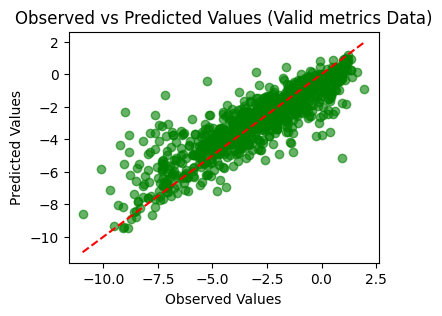

In [281]:
y_pred = best_model.predict(X_valid)


model_results("Valid metrics", y_valid, y_pred)